# Forbes Richest Athletes

<center>
    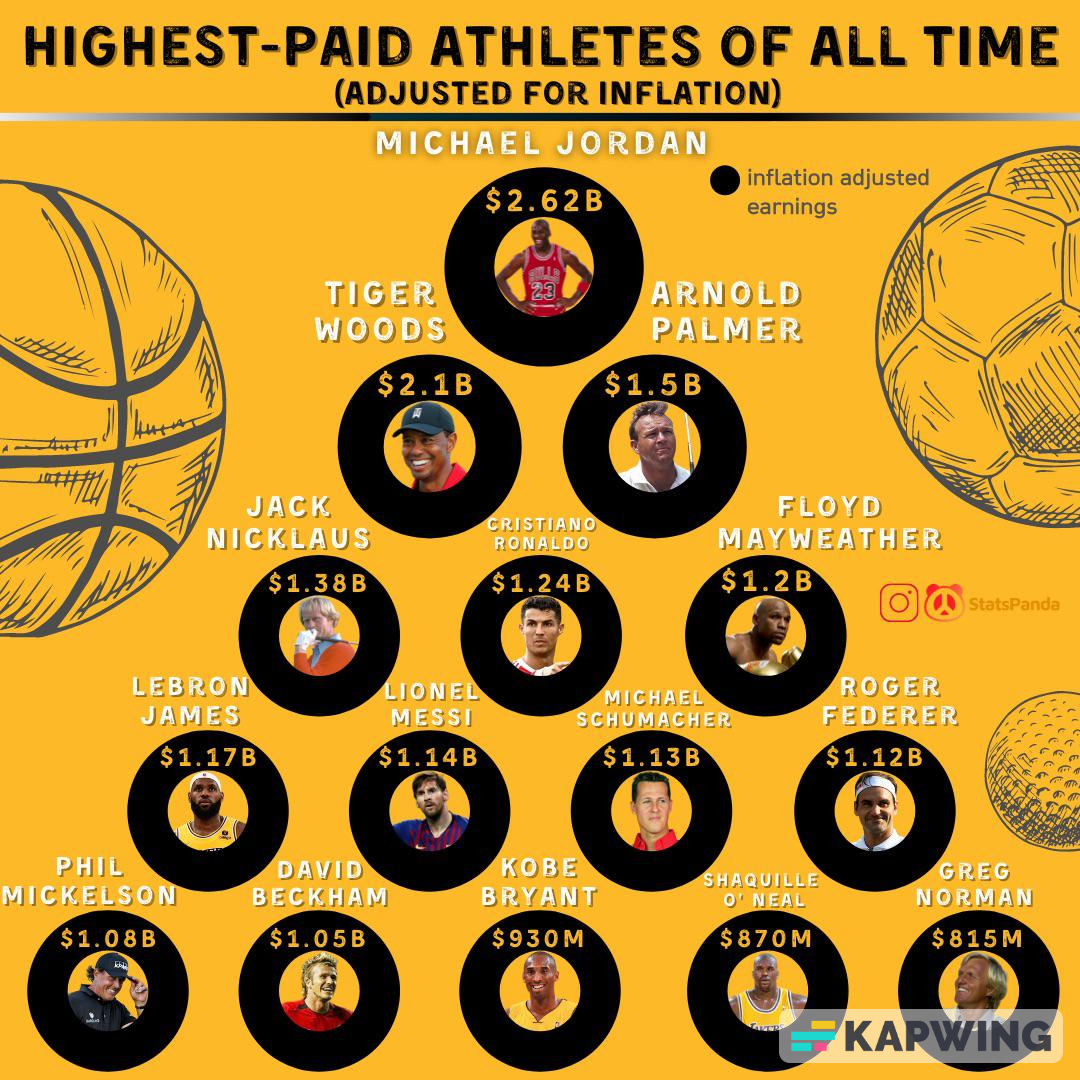
</center>
>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Forbes_Richest_Atheletes.csv')
df.head(100)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
95,96,Mike Tyson,USA,6,>10,Boxing,1999,33.0
96,97,Shaq O'Neal,USA,7,>10,Basketball,1999,31.0
97,98,Lennox Lewis,USA,8,>10,Boxing,1999,29.0
98,99,Dale Earnhardt,USA,9,5,Auto Racing,1999,26.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [4]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [5]:
# Converting 'Previous Year Rank' column to numeric type
df['Previous Year Rank'] = pd.to_numeric(df['Previous Year Rank'], errors='coerce')

# Filling missing values with the mean of the column
df['Previous Year Rank'] = df['Previous Year Rank'].fillna(df['Previous Year Rank'].mean())


In [6]:
df.isnull().sum()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    301 non-null    float64
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [8]:
df.shape

(301, 8)

### Athletes from which country have been listed most number of times in the Forbes Richest from 1990 to 2020

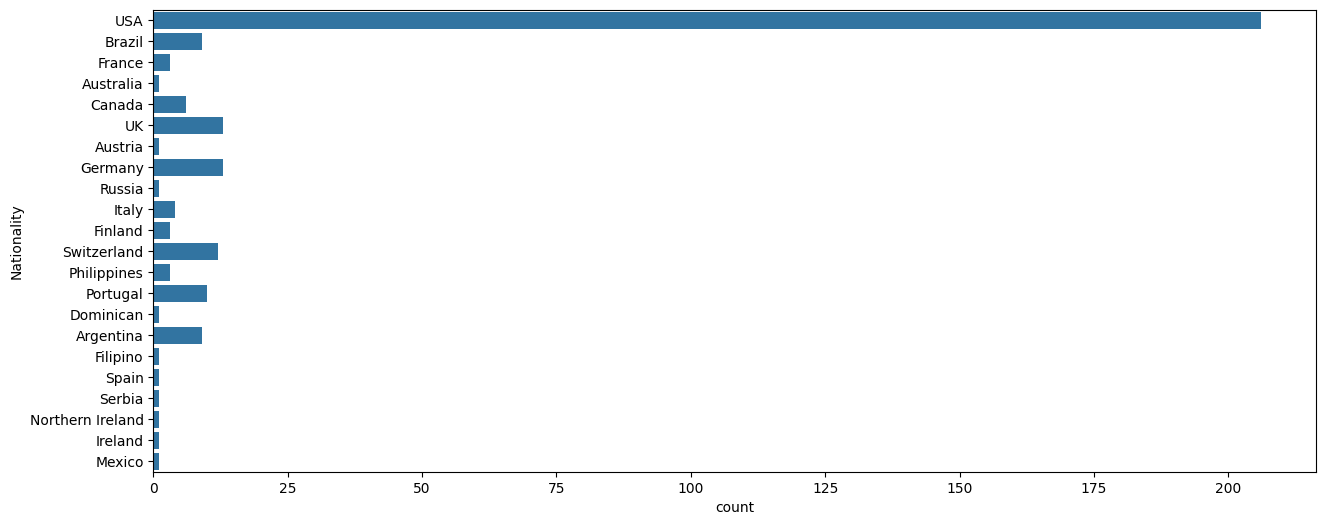

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(df['Nationality'])
plt.show()

##### From the above count plot, it is clear that, Atheletes from **USA** has been listed most number of times in the Forbes Riches Athletes from 1990 to 2020

### Making a plot visualization on yearwise earning(rank-1) Athletes and finding in which year the **rank 1 Athlete** earned the most and who earned the most and what sport did he play? How much did the athelete earned?


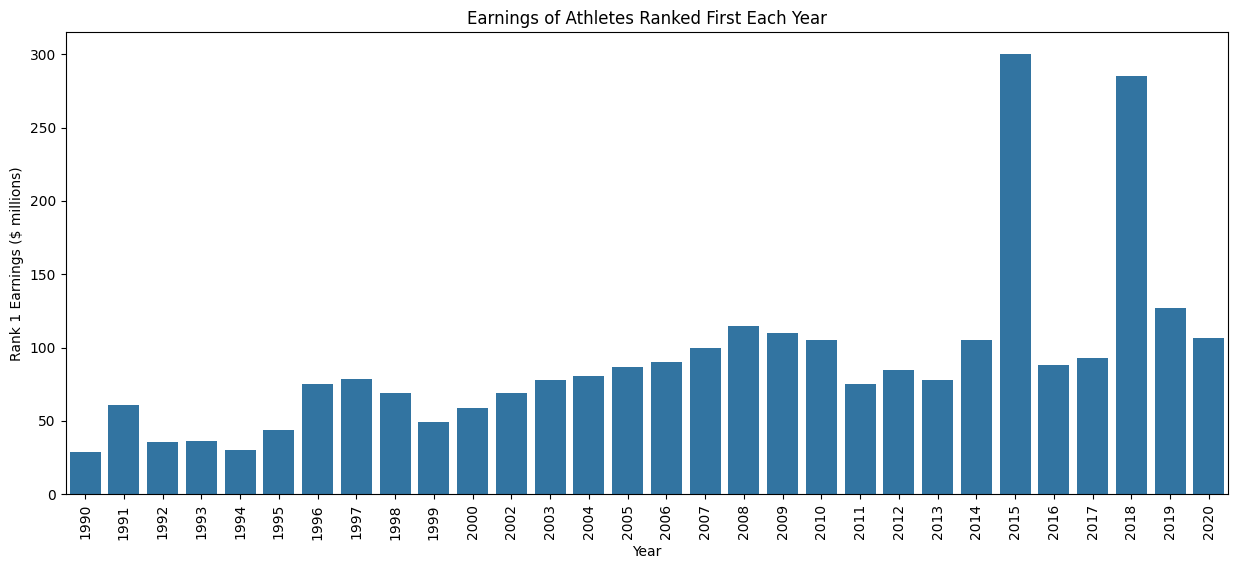

In [10]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df[df['Current Rank'] == 1]['Year'], y=df[df['Current Rank'] == 1]['earnings ($ million)'])
plt.xticks(rotation=90)
plt.ylabel('Rank 1 Earnings ($ millions)')
plt.xlabel('Year')
plt.title('Earnings of Athletes Ranked First Each Year')
plt.show()

##### As seen in the above plot, the highest earning rank of 1 athelete amomg all these years is in year 2015.

## Finding out the name of the Athlete

In [11]:
df[df['Year'] == 2015].head(1)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1.0,Boxing,2015,300.0


##### It is found that, Floyd Mayweather for the Boxing was paid the most in 2015. He earned $300 million

In [12]:
df[df['Year'] == 2015].head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1.0,Boxing,2015,300.0
242,243,Manny Pacquiao,Philippines,2,11.0,Boxing,2015,160.0
243,244,Cristiano Ronaldo,Portugal,3,2.0,Soccer,2015,79.6
244,245,Lionel Messi,Argentina,4,4.0,Soccer,2015,73.8
245,246,Roger Federer,Switzerland,5,7.0,Tennis,2015,67.0


## Finding out, which athlete has been most frequently ranked number 1 from 1990 to 2020

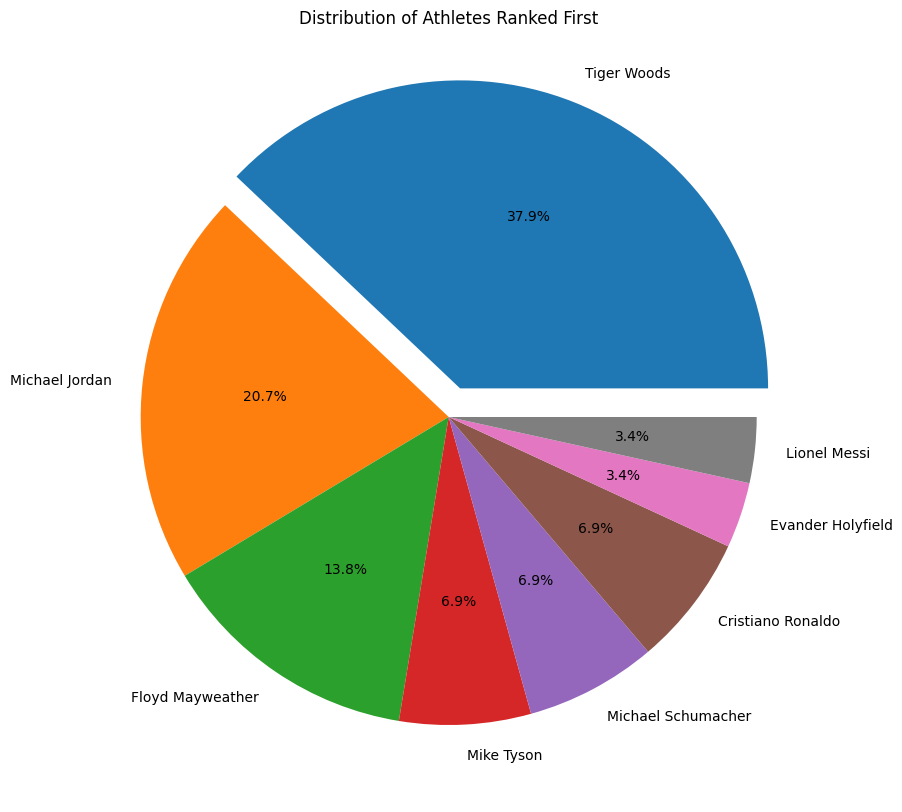

In [13]:
plt.figure(figsize=(10, 10))
rank1_df = df[df['Current Rank'] == 1]
name_counts = rank1_df['Name'].value_counts()

# Selecting top 8 athletes or all if less than 8
labels = name_counts.index[:8]
sizes = name_counts.values[:8]

plt.pie(sizes, autopct='%.1f%%', explode=[0.1 if i == 0 else 0 for i in range(len(labels))], labels=labels)
plt.title('Distribution of Athletes Ranked First')
plt.show()


##### From the above pie-chart, we obsorved that, Tiger Woods has been the most frequently number 1 athlete form 1990 to 2020.

## Finding Players from which two sports have been listed least number of times in the Forbes Richest Athletes List

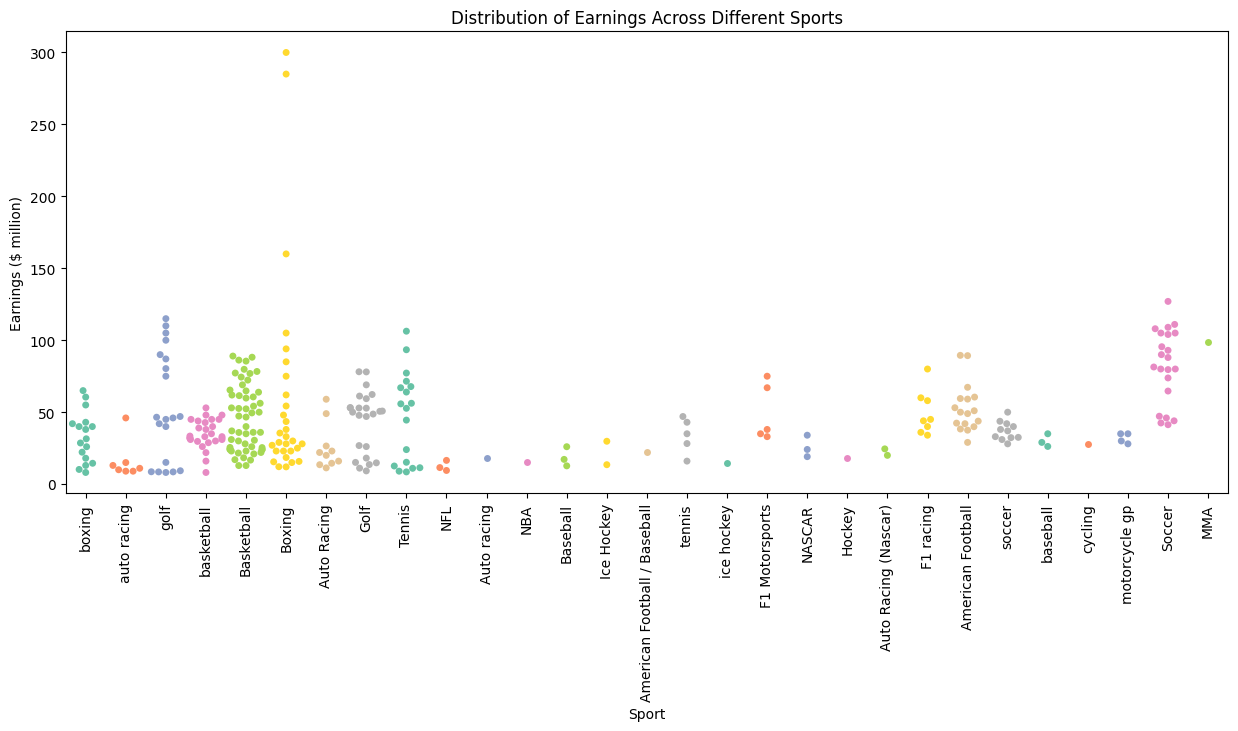

In [14]:
plt.figure(figsize=(15, 6))
sns.swarmplot(x=df['Sport'], y=df['earnings ($ million)'], palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of Earnings Across Different Sports')
plt.ylabel('Earnings ($ million)')
plt.xlabel('Sport')
plt.show()

##### As we can see from the plot, Auto racing, NBA, Americal Football / Baseball, ice hockey, Hocky cycling and MMA are the sports that had the lowest density in terms of number of times players being listed in the Forbes Richest Athletes list.

In [15]:
df[df["Sport"]== 'Auto racing']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
32,33,Ayrton Senna,Brazil,3,3.0,Auto racing,1993,18.5


In [16]:
df[df["Sport"]== 'NBA']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
35,36,Shaquille O'Neal,USA,6,7.169811,NBA,1993,15.2


In [17]:
df[df["Sport"]== 'American Football / Baseball']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
52,53,Deion Sanders,USA,3,38.0,American Football / Baseball,1995,22.5


In [18]:
df[df["Sport"]== 'ice hockey']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
59,60,Wayne Gretzky,Canada,10,5.0,ice hockey,1995,14.5


In [19]:
df[df["Sport"]== 'Hockey']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
78,79,Joe Sakic,Canada,9,7.169811,Hockey,1997,17.9


In [20]:
df[df["Sport"]== 'cycling']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
149,150,Lance Armstrong,USA,9,7.169811,cycling,2005,28.0


In [21]:
df[df["Sport"]== 'MMA']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
274,275,Conor McGregor,Ireland,4,24.0,MMA,2018,99.0


## Relation between Current rank and earnings with the help of a suitable plot.

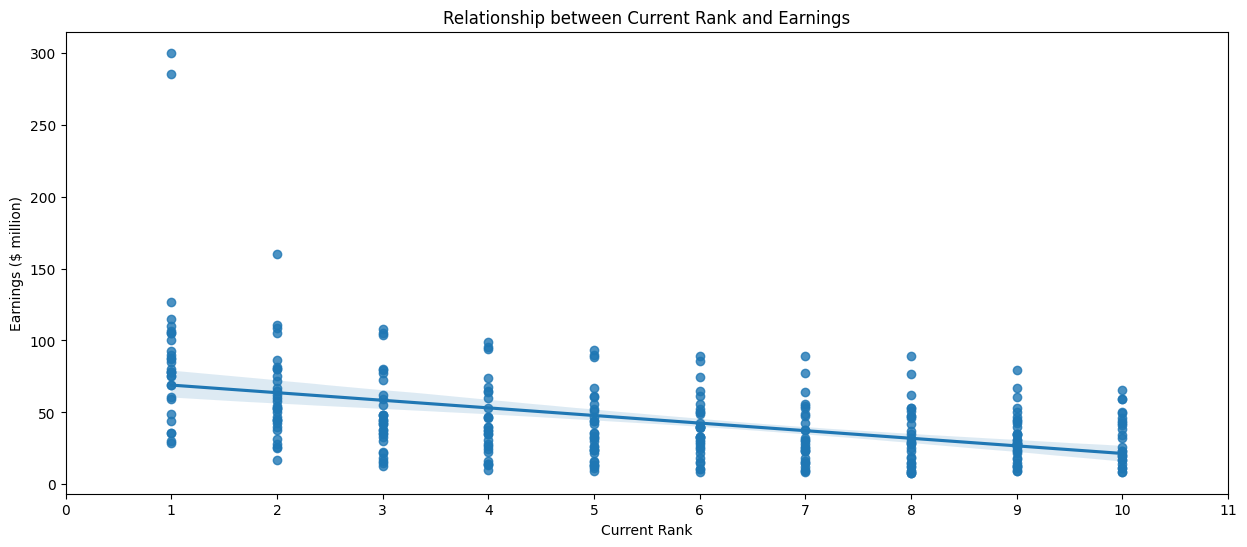

In [22]:
plt.figure(figsize=(15, 6))
sns.regplot(x=df['Current Rank'], y=df['earnings ($ million)'])
plt.xticks(np.arange(0, 12))
plt.xlabel('Current Rank')
plt.ylabel('Earnings ($ million)')
plt.title('Relationship between Current Rank and Earnings')
plt.show()

#### As we can see from the plot, as the rank keeps going down, the earning also keep decreasing.

## Finding which three sports have the highest spread in terms of rarnings (highest Interquartile range[IQR])

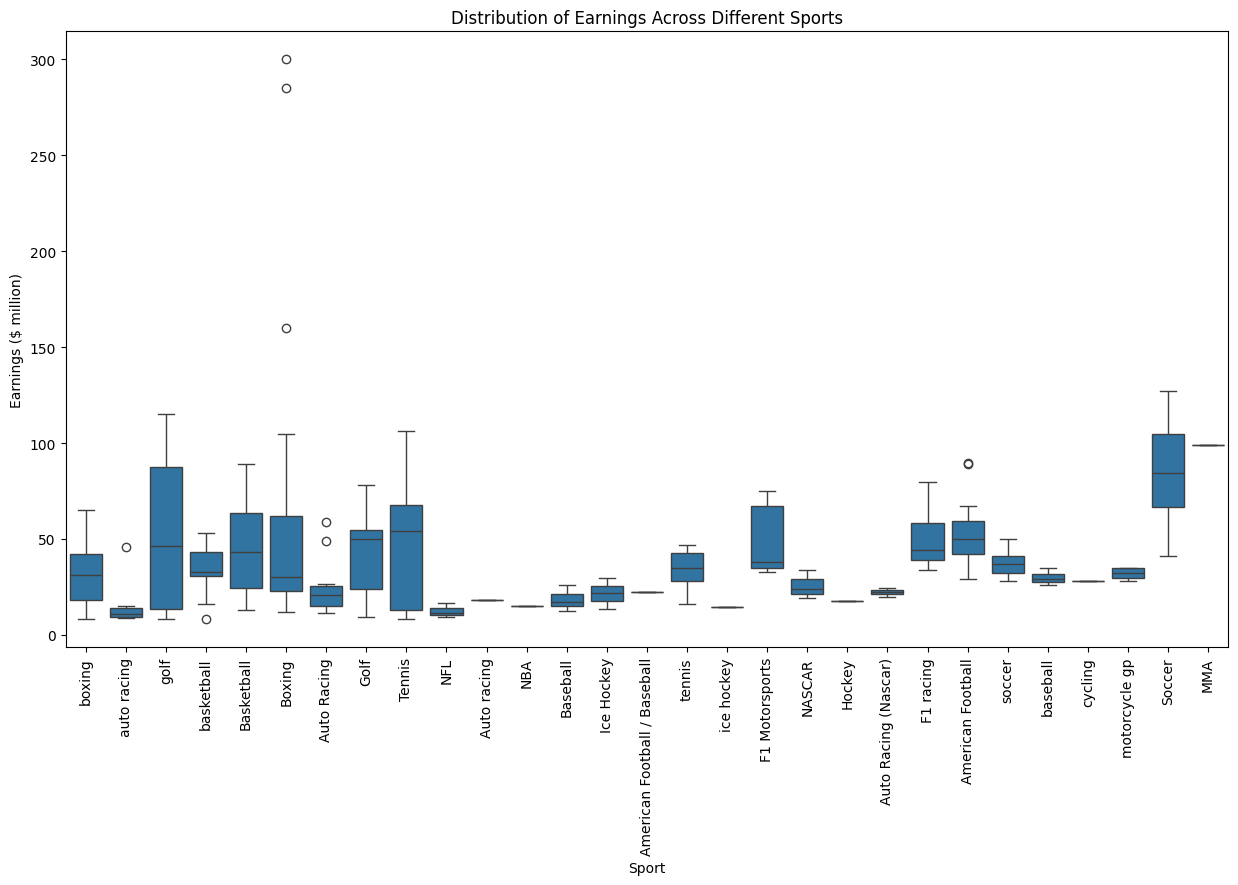

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='earnings ($ million)', x='Sport', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Earnings Across Different Sports')
plt.xlabel('Sport')
plt.ylabel('Earnings ($ million)')
plt.show()

#### Golf, Tennis and Soccer are the three sports with highest IQR.

## Showing a trend in the positions at which Tiger Woods has apperead in the Forbes Richest Athletes list over the years.

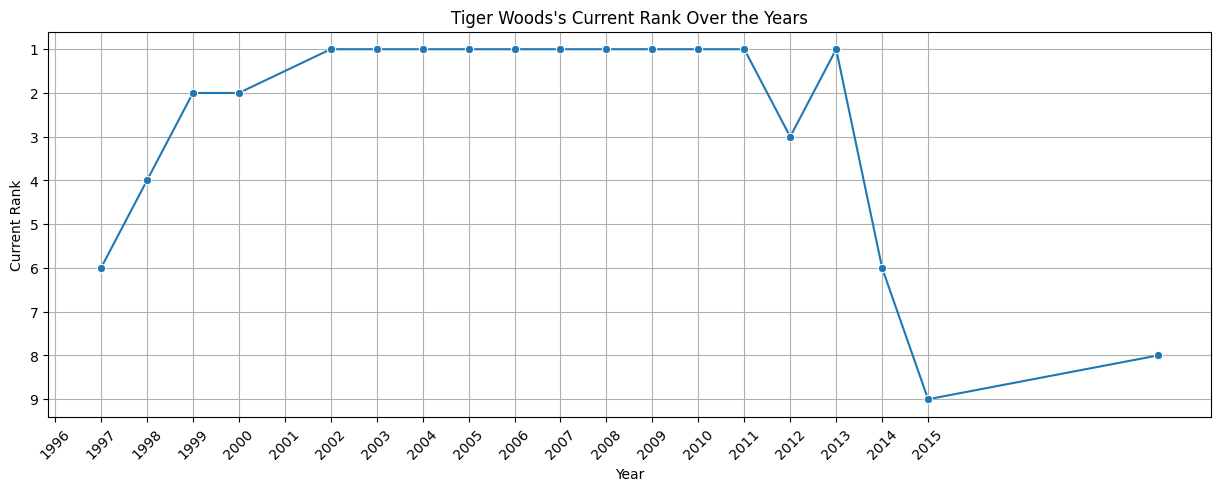

In [24]:
tigerW_df = df[df['Name'] == 'Tiger Woods']

plt.figure(figsize=(15, 5))
sns.lineplot(x=tigerW_df['Year'], y=tigerW_df['Current Rank'], marker='o')
plt.gca().invert_yaxis()
plt.xticks(np.arange(1996, 2016), rotation=45)  
plt.xlabel('Year') 
plt.ylabel('Current Rank') 
plt.title("Tiger Woods's Current Rank Over the Years") 
plt.grid(True)  
plt.show()

#### As we can see from the plot, Tiger Woods has consistently retained rank 1 from 2002 to 2011. He dropped to rank 3 in 2012, but regained his top position in 2013.

## Comemment on the trend of the earnings of Tiger Woods over the years.

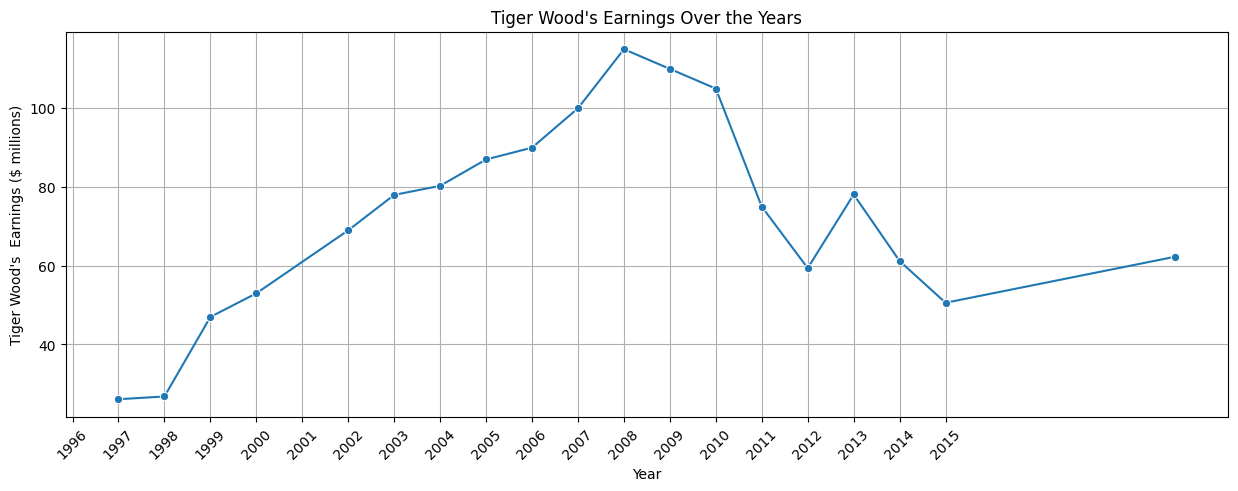

In [25]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=tigerW_df['Year'], y=tigerW_df['earnings ($ million)'], marker='o')
plt.xticks(np.arange(1996, 2016), rotation=45)
plt.xlabel('Year')  
plt.ylabel("Tiger Wood's  Earnings ($ millions)") 
plt.title("Tiger Wood's Earnings Over the Years")
plt.grid(True) 
plt.show()


##### As we can see from the plot, the earinings of Tigeer Wood's had been consistently increasing over the years till 2008. After 2008, we can clearly see a downfall in his earnings over the years. As seen in the news around 2010 he got divorced and there was a visible downfall in his earnings and performance.

## The distribution of Tiger Woods(Comments on how the distribution looks like and interpret some insights from the plot).

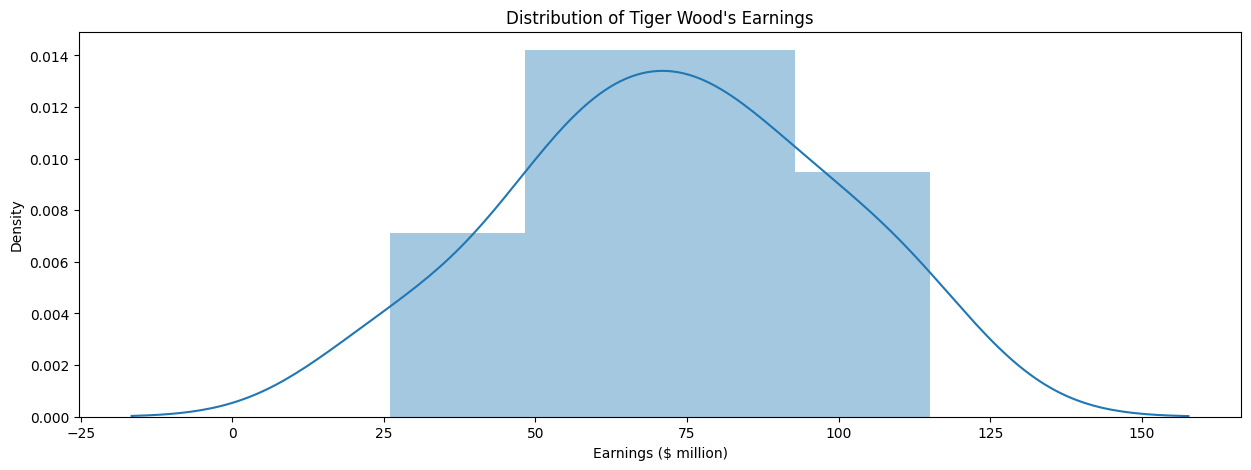

In [26]:
plt.figure(figsize=(15, 5))
sns.distplot(tigerW_df['earnings ($ million)'])
plt.xlabel('Earnings ($ million)')
plt.title("Distribution of Tiger Wood's Earnings")  
plt.show()


In [27]:
tigerW_df['earnings ($ million)'].mean()

72.30526315789473

In [28]:
tigerW_df['earnings ($ million)'].median()

75.0

##### The distribution looks quite symmetric. As we can see the mean and the medain are quite close to each other. The average earning of Tiger Woods is approximately $ 72 million.

## Checking whether the earnings of the richest athlets is increased or not over the period of 30 years and finding the correlation between year and earnings.

In [29]:
corr = df[["Year", "earnings ($ million)"]].corr()
corr

,Year,earnings ($ million)
Year,1.000000,0.653866
earnings ($ million),0.653866,1.000000


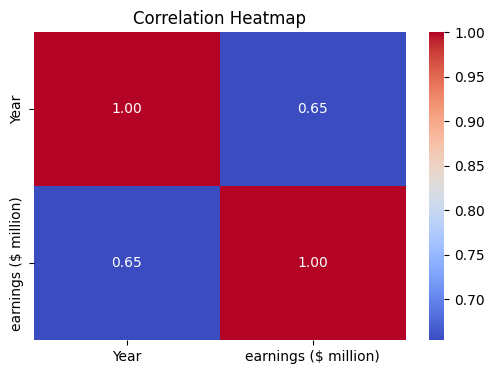

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##### From the above heatmap, we can see that there is a positive correlation between earnings and year. This also can be verfied from the scatterplot shown below.

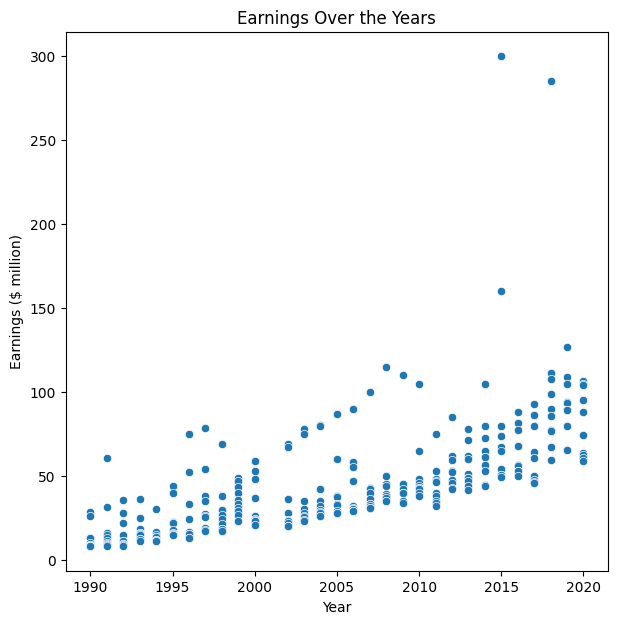

In [31]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=df["Year"], y=df["earnings ($ million)"])
plt.xlabel('Year')
plt.ylabel('Earnings ($ million)')
plt.title('Earnings Over the Years')
plt.show()

##  Earnings trend over the years

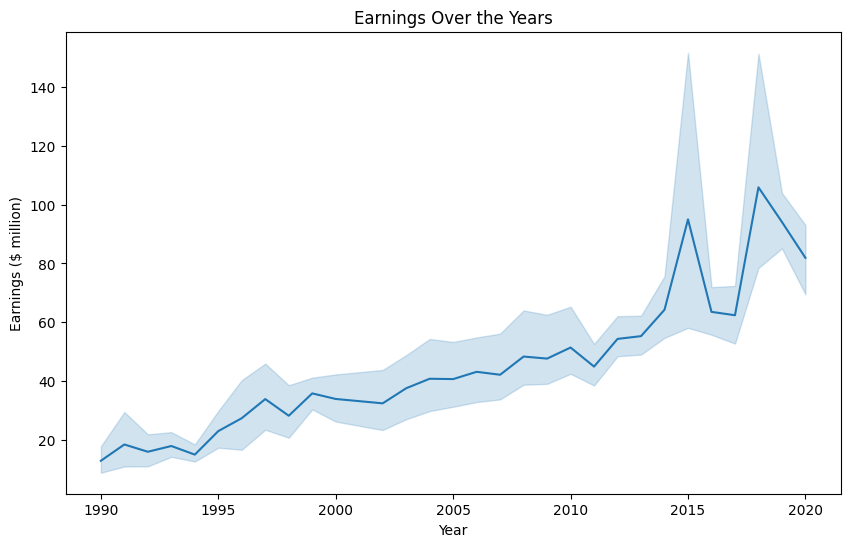

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Year"], y=df["earnings ($ million)"], estimator= np.mean)
plt.xlabel('Year')
plt.ylabel('Earnings ($ million)')
plt.title('Earnings Over the Years')
plt.show()

##### As we can see, over the years, the average earnings of the millioners has been increasing.